# 王蕴着 数据处理

In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('sz50.xlsx',sheetname=None, index_col='datetime')

In [3]:
print(data.keys())

odict_keys(['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG', '600036.XSHG', '600048.XSHG', '600050.XSHG', '600100.XSHG', '600104.XSHG', '600111.XSHG', '600340.XSHG', '600485.XSHG', '600518.XSHG', '600519.XSHG', '600547.XSHG', '600606.XSHG', '600837.XSHG', '600887.XSHG', '600919.XSHG', '600958.XSHG', '600999.XSHG', '601006.XSHG', '601088.XSHG', '601166.XSHG', '601169.XSHG', '601186.XSHG', '601198.XSHG', '601211.XSHG', '601229.XSHG', '601288.XSHG', '601318.XSHG', '601328.XSHG', '601336.XSHG', '601390.XSHG', '601398.XSHG', '601601.XSHG', '601628.XSHG', '601668.XSHG', '601688.XSHG', '601766.XSHG', '601788.XSHG', '601800.XSHG', '601818.XSHG', '601857.XSHG', '601881.XSHG', '601901.XSHG', '601985.XSHG', '601988.XSHG', '601989.XSHG'])


In [4]:
stock = data['600036.XSHG']

In [5]:
new = stock["close"].values

In [6]:
import talib as ta

In [7]:
ma10=ta.SMA(new,timeperiod=10)

In [8]:
ma10[-5:]

array([108.35 , 108.741, 109.176, 110.102, 111.666])

In [9]:
s = pd.Series(ma10)
n = pd.Series(new)

In [10]:
new_index = pd.date_range("20170103",periods=len(s), freq="D")
s.index = new_index
n.index = new_index

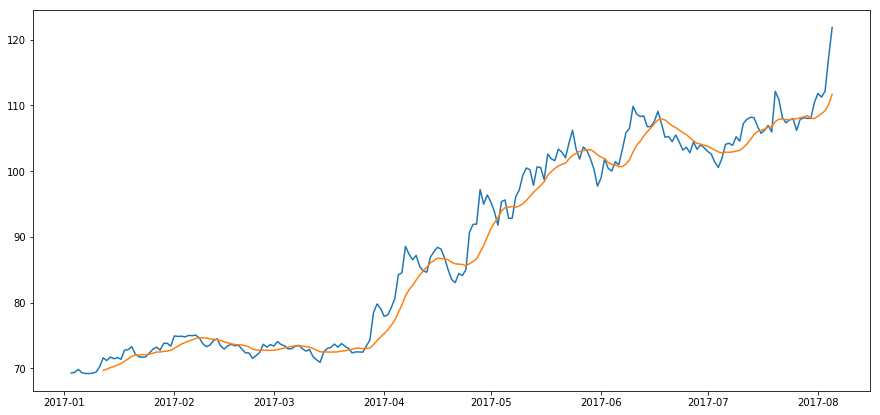

In [21]:
import matplotlib.pyplot as plt


_ = plt.figure(figsize=(15, 7))
_ = plt.plot(n)
_ = plt.plot(s)


plt.show()

In [12]:
PN = pd.Panel({a: df for a, df in data.items()})

In [13]:
from talib import abstract

In [14]:
rocr_100 = {}
for k in data.keys():
    if data[k].empty != True:
        rocr_100[k]=abstract.ROCR100(PN[k],5).dropna()

In [15]:
rocr_100_df = pd.DataFrame(rocr_100)

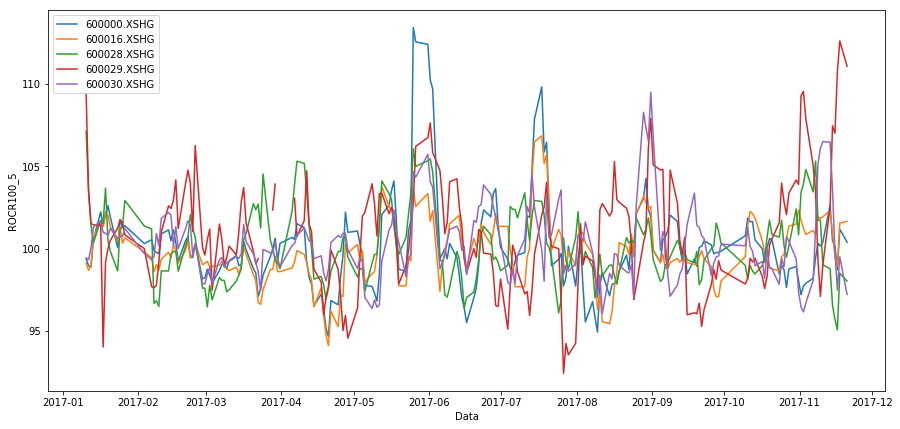

In [16]:
_ = plt.figure(figsize=(15, 7))
_ = plt.plot(rocr_100_df.iloc[:,:5])
_ = plt.ylabel("ROCR100_5")
_ = plt.xlabel("Data")
_ = plt.legend(data.keys())

plt.show()

In [17]:
from datetime import datetime

In [18]:
pnTrue = pd.Panel({k:data[k] for k in data.keys() if data[k].empty != True})

In [19]:
pn_macd = pd.Panel({name:abstract.MACD(value) for name,value in pnTrue.iteritems()})

In [20]:
df_macd = pn_macd.transpose(2,1,0).to_frame()
print(df_macd)

                                       macd  macdsignal   macdhist
datetime            minor                                         
2017-02-24 15:00:00 600000.XSHG    0.871114    1.197907  -0.326792
                    600016.XSHG   -0.007077    0.265328  -0.272405
                    600028.XSHG    0.028081    0.052015  -0.023934
                    600029.XSHG    0.221787    0.132200   0.089587
                    600030.XSHG    0.602873    0.620235  -0.017362
                    600036.XSHG    1.291055    1.245643   0.045412
                    600048.XSHG    2.316978    1.771997   0.544982
                    600050.XSHG   -0.105248   -0.189278   0.084029
                    600100.XSHG    0.453028    0.079491   0.373537
                    600104.XSHG    2.271146    2.012658   0.258488
                    600111.XSHG    2.429090    1.926561   0.502529
                    600340.XSHG    8.025312    5.194384   2.830927
                    600518.XSHG    1.014290    2.387216  -1.37